In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Exploratory Data Analysis

In [5]:
#5 Point summary
df.describe(include="all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [6]:
df.shape

(167, 10)

In [7]:
#To get missing values with count
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values observed

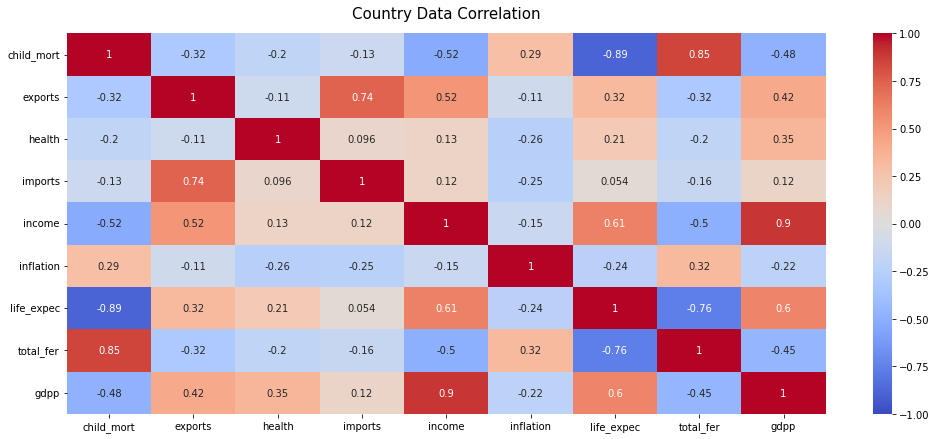

In [8]:
#check the target variable 
plt.figure(figsize=(17, 7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.title('Country Data Correlation', fontdict={'fontsize':15}, pad=15);

Now, here we know our target i.e. top 3 highest positive correlation : 1) gdpp=0.9
                  
                                                                       2) child_mort=0.85
                                                                   
                                                                       3) imports=0.74
                    



In [9]:
# So next step is to check whether the good clustering model obtain from "gdpp VS child_mort" and "gdpp VS imports"

count_data=df[['gdpp', 'child_mort', 'imports']]

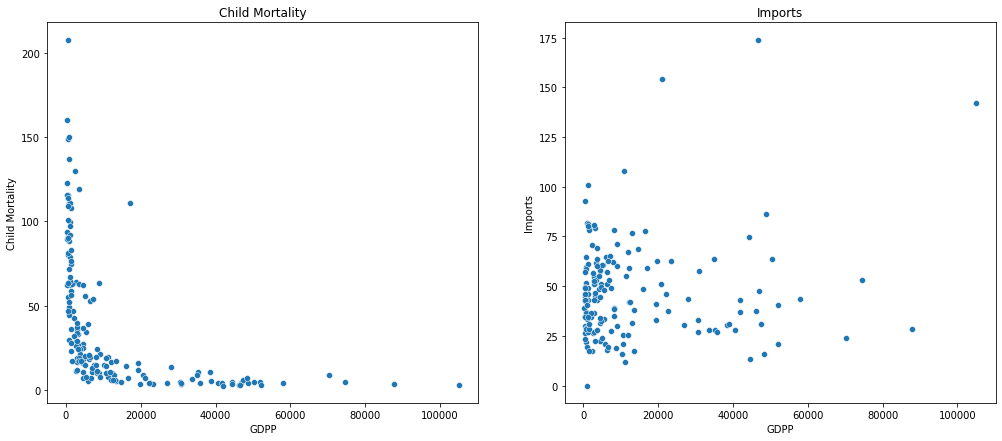

In [10]:
plt.figure(figsize=(17,7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [11]:
# Here we put feature variable to x and response variable to y

x = df.drop('country', axis=1)

y = df['country']

In [12]:
#By using min-max scaler scale the data

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
country_scale = min_max_scaler.fit_transform(df.drop('country', axis=1))
country_scale_df = pd.DataFrame(data = country_scale, columns=df.columns[1:])
country_scale_df['country'] = df['country']

country_scale_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda


# Import the PCA module and plot the variance ratio

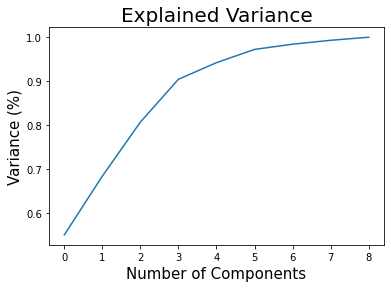

In [13]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(country_scale)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

Looks like a 4 components are enough to describe more than 90% of the variance in the dataset, so we take 4 components for our model

Here we already imports the PCA

In [14]:
#
pca_final = PCA(n_components=4)
#
df_pca = pca_final.fit_transform(x)
df_pca.shape

(167, 4)

In [15]:
#Look at our 4 components
df_pca = pd.DataFrame(df_pca)
df_pca.head()


,0,1,2,3
0,-19815.128018,-1651.124720,38.424930,-0.192311
1,-11338.938992,1493.469028,-28.182163,-14.070214
2,-8926.352589,3264.684102,-11.916113,-16.804181
3,-14652.465937,-867.795270,59.558400,40.492538
4,896.142032,1898.478151,-29.133957,0.507663


In [16]:
# correlation matrix for the principle components
corrmat = np.corrcoef(df_pca.transpose())

<AxesSubplot:>

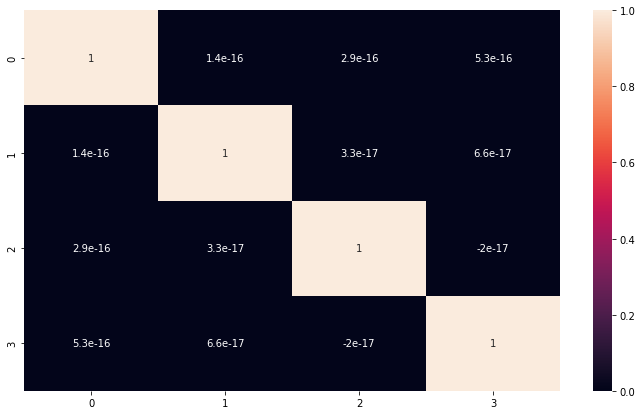

In [17]:
# Plot correlation matrix
plt.figure(figsize = (12,7))
sns.heatmap(corrmat, annot = True)

# Kmeans Clustering

To decide how many number of clusters consider we are going to use a most popular elbow method

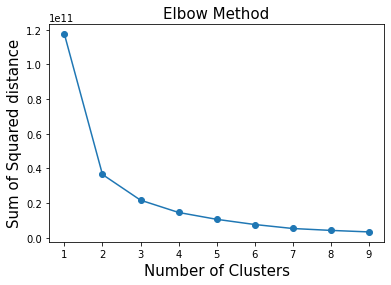

In [18]:
#plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(x)
    a.append(kmean.inertia_)
    
plt.plot(K, a, marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [19]:
###As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters

In [20]:
country_scale = min_max_scaler.fit_transform(df.drop('country', axis=1))
country_scale_df = pd.DataFrame(data = country_scale, columns=df.columns[1:])

In [21]:
#choose no of clusters 3
kmeans = KMeans(n_clusters = 3, random_state = 117)
kmeans.fit(country_scale_df)

KMeans(n_clusters=3, random_state=117)

In [22]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    87
0    46
2    34
dtype: int64

Now we are going to check how our model is,using Silhouette Coefficient

calculate how good our model is


In [23]:
#calculate Silhouette Coefficient for K=3

from sklearn import metrics
metrics.silhouette_score(country_scale_df, kmeans.labels_)

0.34265474105126204

# Prediction

In [24]:
#predicting values
cluster_labels = kmeans.fit_predict(country_scale_df)

In [25]:
preds=kmeans.labels_
kmeans_df=pd.DataFrame(df)
kmeans_df['KMeans_Clusters']=preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [26]:
#save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

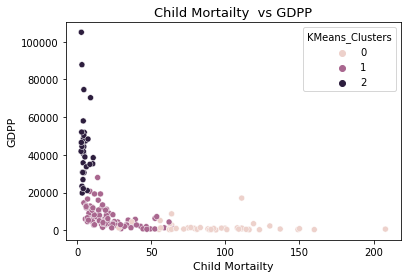

In [27]:
#Visualization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'], kmeans_df['gdpp'], hue='KMeans_Clusters', data=kmeans_df)
plt.title('Child Mortailty  vs GDPP', fontsize=13)
plt.xlabel('Child Mortailty', fontsize=11)
plt.ylabel('GDPP', fontsize=11)
plt.show()

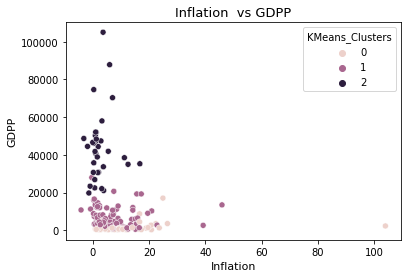

In [28]:
#Visualization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'], kmeans_df['gdpp'], hue='KMeans_Clusters', data=kmeans_df)
plt.title('Inflation  vs GDPP', fontsize=13)
plt.xlabel('Inflation', fontsize=11)
plt.ylabel('GDPP', fontsize=11)
plt.show()

Here from above both clustering graphs we conclude:

     1)Country having high child-mortality, low GDP per catia and low inflation is a under-developing country,
     
     2)Country having low child-mortality, high gdpp and high infaltion is the developed country
     
     so i.e. 0 = under development country
             1 = developing country
             2 = developed country

In [29]:
## Find number of developed country,developing country,under-development country

under_development=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of under development country", len(under_development))
print("Number of developing country", len(developing))
print("Number of developed country", len(developed))

Number of under development country 46
Number of developing country 87
Number of developed country 34
